In [2]:
import glob
f1=glob.glob("../GPM/ORO/VN/2B*HDF5")
print(len(f1))
f2=glob.glob("../GPM/ORO/VN/2A*HDF5")
print(len(f2))

72
72


In [5]:
f1=sorted(f1)
f2=sorted(f2)
import io_subs
import numpy as np
n_tot=0

import xarray as xr
def write_subset(z_meas_L,p_type_L,bin_nodes_L,sfc_bin_L,p_rate_cmb_L,dm_L,bin_zero_deg_L,bin_storm_top_L,orbit_number):
    ds=xr.Dataset()
    ds["z_meas"]=xr.DataArray(z_meas_L,dims=["n","n_bins","n_freq"])
    ds["p_type"]=xr.DataArray(p_type_L,dims=["n"])
    ds["bin_nodes"]=xr.DataArray(bin_nodes_L,dims=["n","n5"])
    ds["sfc_bin"]=xr.DataArray(sfc_bin_L,dims=["n","n2"])
    ds["p_rate_cmb"]=xr.DataArray(p_rate_cmb_L,dims=["n","n_bins_cmb"])
    ds["dm"]=xr.DataArray(dm_L,dims=["n","n_bins_cmb"])
    ds["bin_zero_deg"]=xr.DataArray(bin_zero_deg_L,dims=["n"])
    ds["bin_storm_top"]=xr.DataArray(bin_storm_top_L,dims=["n"])
    comp = dict(zlib=True, complevel=5)
    ds.to_netcdf("output/subset_%s.nc"%orbit_number,encoding={"z_meas":comp,"p_type":comp,"bin_nodes":comp,"sfc_bin":comp,"p_rate_cmb":comp,"dm":comp,"bin_zero_deg":comp,"bin_storm_top":comp})
    return
out=open("output/summary.txt","w")
import netCDF4 as nc
dict_cmb={}
for fcmb,fdpr in zip(f1,f2):
    z_meas_L=[]
    p_type_L=[]
    bin_nodes_L=[]
    sfc_bin_L=[]
    p_rate_cmb_L=[]
    dm_L=[]
    bin_zero_deg_L=[]
    bin_storm_top_L=[]
    #print(fcmb,fdpr)
    qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,oe_wvp,oe_lwp,oe_iwp,oesfc_precip,stormTop,nearSfcPrecip,zeroDegAltitude,surfaceType=io_subs.readCMB(fcmb)
    pType=np.array(pType/1e7,dtype=int)
    a=np.nonzero(pType>0)
    n_tot+=len(a[0])
    with nc.Dataset(fdpr) as fh:
        z_meas=fh["FS/PRE/zFactorMeasured"][:]
        storm_top=fh["FS/PRE/binStormTop"][:]
        bin_zero_deg=fh["FS/VER/binZeroDeg"][:]
        #print(fh.FileHeader.split()[10:12])
        orbit_num_dpr=fh.FileHeader.split()[11].split("=")[1][:-1]
        lat_dpr=fh["FS/Latitude"][:]
        lon_dpr=fh["FS/Longitude"][:]
    with nc.Dataset(fcmb) as fh:
        p_rate_cmb=fh["KuKaGMI/precipTotRate"][:]
        #print(fh.FileHeader.split()[12])
        orbit_num=fh.FileHeader.split()[12].split("=")[1][:-1]
        #print(orbit_num)
    bin_zero_deg_L.extend(bin_zero_deg[a])
    bin_storm_top_L.extend(storm_top[a])
    z_meas_L.extend(z_meas[a])
    p_type_L.extend(pType[a])
    bin_nodes_L.extend(binNodes[a])
    sfc_bin_L.extend(sfcBin[a])
    p_rate_cmb_L.extend(p_rate_cmb[a])
    dm_L.extend(dm[a])
    print(np.array(sfc_bin_L).shape)
    print(lon_dpr.shape,lon.shape,lon_dpr[0,24],lon[0,24])
    out.write("%s %s %s %s\n"%(orbit_num,orbit_num_dpr,fcmb,fdpr))
    out.write("Number of points: %d\n"%len(a[0]))
    out.flush()
    dict_cmb[orbit_num]=[fcmb,fdpr,len(a[0])]
    print(orbit_num,orbit_num_dpr,fcmb,fdpr)

    #if len(a[0])>0:
    #    write_subset(z_meas_L,p_type_L,bin_nodes_L,sfc_bin_L,p_rate_cmb_L,dm_L,bin_zero_deg_L,bin_storm_top_L,orbit_num)
    #break

(6015, 2)
(740, 49) (740, 49) -101.90987 -101.90987
46426 46426 ../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220501-S011234-E012112.046426.V07A.HDF5 ../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220501-S011234-E012112.046426.V07A.HDF5
(2600, 2)
(734, 49) (734, 49) -125.04989 -125.04989
46427 46427 ../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220501-S024512-E025345.046427.V07A.HDF5 ../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220501-S024512-E025345.046427.V07A.HDF5
(690, 2)
(614, 49) (614, 49) -80.80502 -80.80502
46435 46435 ../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220501-S144043-E144752.046435.V07A.HDF5 ../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220501-S144043-E144752.046435.V07A.HDF5
(2024, 2)
(743, 49) (743, 49) -104.223625 -104.223625
46436 46436 ../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220501-S161317-E162157.046436.V07A.HDF5 ../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220501-S161317-E162157.046436.V07A.HDF5
(753, 2)
(714, 49) (714, 49) -127.067

In [ ]:
qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,oe_wvp,oe_lwp,oe_iwp,oesfc_precip,stormTop,nearSfcPrecip,zeroDegAltitude,surfaceType=io_subs.readCMB(fcmb)

In [10]:
n_pix=[v[-1] for k,v in dict_cmb.items()]
orbs=[k for k,v in dict_cmb.items()]

In [15]:
print(n_pix)
ind_max=np.argmax(n_pix)
print(ind_max)
print(orbs[ind_max])
print(dict_cmb[orbs[ind_max]])
fcmb,fdpr=dict_cmb[orbs[ind_max]][:2]


[6015, 2600, 690, 2024, 753, 1, 2808, 6000, 0, 305, 950, 91, 200, 1790, 5343, 188, 55, 6, 24, 217, 2204, 721, 0, 3326, 2030, 4, 168, 6, 1903, 5021, 0, 117, 31, 5, 5362, 171, 5039, 717, 2459, 2, 598, 0, 4321, 3149, 0, 1285, 127, 1124, 29, 4011, 3145, 124, 191, 0, 3877, 2232, 3771, 1559, 3573, 1750, 281, 955, 0, 886, 1527, 1309, 1164, 2, 6, 121, 6732, 339]
70
46579
['../GPM/ORO/VN/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20220510-S211231-E212029.046579.V07A.HDF5', '../GPM/ORO/VN/2A-CS-CONUS.GPM.DPR.V9-20211125.20220510-S211231-E212029.046579.V07A.HDF5', 6732]


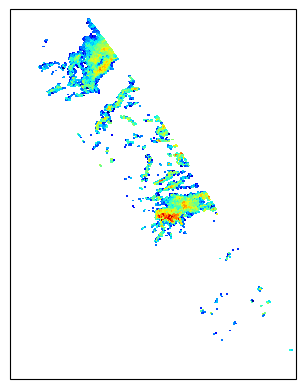

In [ ]:
qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,oe_wvp,oe_lwp,oe_iwp,oesfc_precip,stormTop,nearSfcPrecip,zeroDegAltitude,surfaceType=io_subs.readCMB(fcmb)
import matplotlib.pyplot as plt
plt.figure()
import cartopy.crs as ccrs
ax=plt.subplot(111,projection=ccrs.PlateCarree())
import matplotlib.colors as mcolors
plt.pcolormesh(lon[300:600],lat[300:600],nearSfcPrecip[300:600],cmap="jet",norm=mcolors.LogNorm())
